# Machine Learning and Statistics - Tasks


## Task 1 - Square Root



This assignment demonstrates how to create a Python function called  $sqrt2$  that calculates and prints to the screen the square root of 2 to 100 decimal places. This code cannot depend on any of the modules available in the standard library. 


### Research 

"The early Pythagoreans were convinced that every conceivable number could in principle be written in fractional form, as the ratio of two natural numbers. Since there is an infinite supply of natural numbers, they thought, there must be enough to do the job. The discovery that this was an erroneous belief, possibly by the geometer Hippasus in the 5th century BCE, was shocking news. According to legend, Hippasus was hurled off a boat and drowned to prevent the truth becoming widely known, such was its threat to the Pythagorean concept of order in the Universe!." [1] 

Numbers that cannot be expressed as a ratio of natural numbers are called irrational numbers, even though they make perfect sense to modern mathematicians. It is actually easy to see why some numbers are irrational. A famous example is the square root of 2, which is roughly 1.4142, and denoted √2. 

Before one can attempt to write Python code for ...sqrt2..., it is important to gain a better understanding of an effecient method of calculation. "Newton’s method also known as Newton-Raphson method is a root-finding algorithm that produces successively better approximations of the roots of a real-valued function." [2]

$$x_{n+1}=\dfrac{1}{2}\left( x_{n}+\dfrac{a}{x_{n}}\right)$$

The approximations of the root go as:

$x_(n+1) = x_n - f(x_n) / f(x_n)$, $x_0$  is the rough approximation of the root done at the first and the successive approximations go as  $x_1, x_2,...$. $f(x_n)$ is the function whose root is to be determined and $f(x_n)$ is the derivative of the function.

"Newton's Method is used to find successive approximations to the roots of a function. If the function is y = f(x) and x0 is close to a root, then we usually expect the formula below to give x1 as a better approximation. Then you plug the x1 back in as x0 and iterate" (2)

Newton's Method for square root goes as follows;(4) 
If we have to find the square root of a number n, the function would be $f(x) = x² - N$ and we would have to find theroot of the function,$f(x)$

Here, the value $f(x_n) at x = x_n$ is $f(x_n) = x_n² - N$

And, the derivative at the point is $f(x_n) = 2 * x_n$

Now, the better approximation can be found using [1]

$$ x_(n+1) = x_n - (x_n² - N) / (2 * x_n) $$
$$ x_(n+1) = x_n - x_n² / (2 * x_n) + N/ (2 * x_n) $$
$$ x_(n+1) = x_n - x_n / 2+ N/ (2 * x_n) $$
$$ x_(n+1) = x_n / 2+ N/ (2 * x_n) $$
$$ x_(n+1) = (x_n + N/ x_n) / 2 $$

Integer square root of a number is the floor of the square root. The algorithm can be modified a little to find integer square root of a number. The while condition here would be approximate $*$ approximate $> N$. The algorithm terminates when the approximate squared is less than or equal to N.
The iteration relation here is:

$x_(n+1) = (x_n + N // x_n) // 2$ where $//$ is integer division [4]

A classic analysis text (Rudin, Principles of Mathematical Analysis) approaches the proof of convergence of this algorithm as follows: we prove that the sequence converges monotonically and is bounded, and hence it has a limit; we then easily see that the limit is $√$ [5]

This method can be applied to the calculating the square root of 2. If we start with $x_1=1$

The number of accurate digits approximately doubles on each iteration. This is a very efficient concergence rate.

![image](https://raw.githubusercontent.com/NiamhOL/Machine-Learning-and-Statistics-2020-Assignments/main/images/Newton.PNG) 

### AdvantagesDisadvantages of Newton's Method

When it converges, Newton's method usually converges very quickly and this is its main advantage. However, Newton's method is not guaranteed to converge and this is obviously a big disadvantage especially compared to the bisection and secant methods which are guaranteed to converge to a solution (provided they start with an interval containing a root).

Newton's method also requires computing values of the derivative of the function in question. This is potentially a disadvantage if the derivative is difficult to compute. 

The stopping criteria for Newton's method differs from the bisection and secant methods. In those methods, we know how close we are to a solution because we are computing intervals which contain a solution. In Newton's method, we don't know how close we are to a solution. All we can compute is the value  and so we implement a stopping criteria based on."[3]



## Square Root 2 in Python 

Loops are often used in programs that compute numerical results by starting with an approximate answer and iteratively improving it. Suppose that you want to know the square root of n. If you start with almost any approximation, you can compute a better approximation with the following formula:


The following implementation of Newton’s method requires two parameters. The first is the value whose square root will be approximated. The second is the number of times to iterate the calculation yielding a better result [7]

In [8]:
def newton_method(number, number_iters = 500):    # https://medium.com/@sddkal/newton-square-root-method-in-python-270853e9185d
    a = float(number) # number to get square root of
    for i in range(number_iters): # iteration number
        number = 0.5 * (number + a / number) # update
 # x_(n+1) = 0.5 * (x_n +a / x_n)
    return number

print (newton_method(2))

1.414213562373095


In [3]:
x = 2 * 10 ** 200  
r = x

def sqrt2(x, r):
    d0 = abs(x - r**2)
    dm = abs(x - (r-1)**2)
    dp = abs(x - (r+1)**2)
    minimised = d0 <= dm and d0 <= dp
    below_min = dp < dm
    return minimised, below_min

while True:
    oldr = r
    r = (r + x // r) // 2

    minimised, below_min = sqrt2(x, r)
    if minimised:
        break

    if r == oldr:
        if below_min:
            r += 1
        else:
            r -= 1
        minimised, _ = sqrt2(x, r)
        if minimised:
            break

print(f'{r // 10**100}.{r % 10**100:0100d}') # [8]

1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727


"Newton’s algorithm will eventually reach a point where the new approximation is no better than the previous. At that point, we could simply stop. In other words, by repeatedly applying this formula until the better approximation gets close enough to the previous one, we can write a function for computing the square root that uses the number of iterations necessary and no more.

This implementation, shown in codelens, uses a while condition to execute until the approximation is no longer changing. Each time through the loop we compute a “better” approximation using the formula described earlier. As long as the “better” is different, we try again. Step through the program and watch the approximations get closer and closer." [7]

## Validating the above method

In [7]:
from decimal import *
getcontext().prec = 101 # Can try other numbers here
Decimal(2).sqrt()

Decimal('1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727')

In [ ]:
# https://apod.nasa.gov/htmltest/gifcity/sqrt2.1mil [10]
sqrt2byNasa = "1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727"
# check I have 100 decimal places places/ 101 significant places.
import re
# verify 100 decimal places
print("number of significant digits",len(str(sqrt2byNasa)[1:]))


## Conclusions 

The algorithm for Newton’s method for numerically approximating a root of a function can be summarised as follows:

* Given a function $ f(x) $ of a variable x and a way to compute both $f(xi)$ and its derivative $ f(xi)$ at a given point $ xi.$
* Set values for the desired numerical relative precision Δd of the result as well as for the maximum number of iterations N the algorithm is allowed to take.
* Choose an initial guess $ x0 $, ideally close to the location of the root to be approximated.
* Compute the next approximation x1 for the root as
$ x1=x0–f(x0)f(x0) $
* Repeat as $ xi+1=xi–f(xi)f(xi)$ and compute the relative difference between the approximations as
$ Δ=|xi+1−xi||xi|=|f(xi)||f(xi)xi| $ until one of two things happens:
1. the maximum number of allowed iterations is reached, i.e., $ i>N $
2. the desired numerical relative precision is reached, i.e., $ \Delta <\Delta d $

If the algorithm reaches the maximum number of iterations that you set, this can but does not have to indicate that convergence is not possible. Experimentation with suitable values for both Δd and N may be needed to arrive at a satisfactory result. [9] 

### References and Biblography for Task 1

1. https://cosmosmagazine.com/mathematics/the-square-root-of-2/

2. https://hackernoon.com/calculating-the-square-root-of-a-number-using-the-newton-raphson-method-a-how-to-guide-yr4e32zo

3. http://www.cs.utsa.edu/~wagner/CS3343/newton/sqrt.html

4. https://www.math.ubc.ca/~pwalls/math-python/roots-optimization/newton/

5. https://medium.com/@surajregmi/how-to-calculate-the-square-root-of-a-number-newton-raphson-method-f8007714f64

6. https://math.mit.edu/~stevenj/18.335/newton-sqrt.pdf

7. https://runestone.academy/runestone/books/published/thinkcspy/MoreAboutIteration/NewtonsMethod.html

8. https://stackoverflow.com/questions/64278117/is-there-a-way-to-create-more-decimal-points-on-python-without-importing-a-libra
 
9. https://computingskillset.com/solving-equations/the-newton-raphson-method-explained-details-pictures-python-code/

 
 


## Task 2 - Chi Squared

The Chi-squared test for independence is a statistical hypothesis test like a t-test. It is used to analyse whether two categorical variables are independent. The Wikipedia article gives the table below as an example,stating the Chi-squared value based on it is approximately 24.6. Use scipy.stats to verify this value and calculate the associated p value. You should include a short note with references justifying your analysis in a markdown cell.

### Introduction

"The Chi-Squared test is a statistical hypothesis test that assumes (the null hypothesis) that the observed frequencies for a categorical variable match the expected frequencies for the categorical variable. The test calculates a statistic that has a chi-squared distribution, named for the Greek capital letter Chi (X) pronounced “ki” as in kite." [1] In the exampl used from Wikipedia, a random sample of 650 residents of a city was taken and their occupation was recorded as "white collar" "blue collar" or "no collar". The null hypothesis is that each person's neighbourhood of residence is independent of the person's occupation classification.

![Image](https://raw.githubusercontent.com/NiamhOL/Machine-Learning-and-Statistics-2020-Assignments/main/images/ChiSq.PNG)

$$ \dfrac{\left( observed-\exp ected\right) ^{2}}{\exp ected}= \dfrac{\left( 90-80.54\right) ^{2}}{80.54}\simeq 1.11 $$

In that "cell" of the table we have

$$ 150\times \dfrac{349}{650}\simeq 80.54 $$

The sum of these quantities over all of the cells is the test statistic; in this case, {\displaystyle \approx 24.6}{\displaystyle \approx 24.6}. Under the null hypothesis, this sum has approximately a chi-squared distribution whose number of degrees of freedom are

If the test statistic is improbably large according to that chi-squared distribution, then one rejects the null hypothesis of independence.[2]

The Chi-Squared test does this for a contingency table, first calculating the expected frequencies for the groups, then determining whether the division of the groups, called the observed frequencies, matches the expected frequencies.

The result of the test is a test statistic that has a chi-squared distribution and can be interpreted to reject or fail to reject the assumption or null hypothesis that the observed and expected frequencies are the same. Variables are considered independent if the observed and expected frequencies are similar, that the levels of the variables do not interact, are not dependent. "The chi-square test of independence works by comparing the categorically coded data that you have collected (known as the observed frequencies) with the frequencies that you would expect to get in each cell of a table by chance alone (known as the expected frequencies." [3] 

We can interpret the test statistic in the context of the chi-squared distribution with the requisite number of degress of freedom as follows:

* If Statistic >= Critical Value: significant result, reject null hypothesis (H0), dependent.
* If Statistic < Critical Value: not significant result, fail to reject null hypothesis (H0), independent.
The degrees of freedom for the chi-squared distribution is calculated based on the size of the contingency table as. 

In terms of a p-value and a chosen significance level (alpha), the test can be interpreted as follows:

* If p-value <= alpha: significant result, reject null hypothesis (H0), dependent.
* If p-value > alpha: not significant result, fail to reject null hypothesis (H0), independent.
For the test to be effective, at least five observations are required in each cell of the contingency table. [1]


### Chi-Squared and Python

In the stats library of scipy, we can call for two chi-square test commands, one is 'chi2_contingency' and another is 'chisquare'. We use 'chi-square' when we want to find any relation between two categorical groups. The null hypothesis is: two groups have no significant difference. 'Chisquare' is used when we want to see if a set of discreet random variable is distributed evenly or not. If the data is spread evenly or not is checked by computing a expected frequency of the selected discreet random variable and then it is tallied with the original frequency distribution.

'Chi2_contingency' is used to statistically measure p-value, degrees of freedom, and the table of expected observation. 



In [13]:
from numpy import random
x = random.chisquare(df=2, size=(2, 3))
print(x)

[[0.65592958 2.86783565 4.29590044]
 [0.5927611  2.09287617 1.8128456 ]]


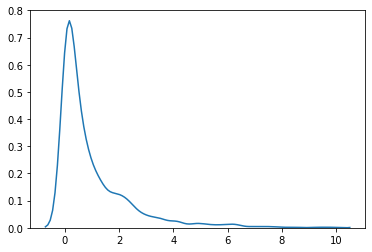

In [14]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(random.chisquare(df=1, size=1000), hist=False)
plt.show()

Chi-Square test is a statistical method to determine if two categorical variables have a significant correlation between them. We use various functions in numpy library to carry out the chi-square test.[12]

In [22]:
# Import module for storing dataframe and calculating chi-square
import pandas as pd 
import scipy.stats as stats 

# Create df with table data. 

data = {'A':[90, 30, 30, 150], 'B':[60, 50, 40, 150], 'C':[104, 51, 45, 200],
        'D':[95, 20, 35, 150], 'Total':[349, 151, 150, 650]}
df = pd.DataFrame(data,index=['White collar', 'Blue collar', 'No Collar', 'Total'])

# Display the Observed results 
print("Data Table")
df

Data Table


,A,B,C,D,Total
White collar,90,60,104,95,349
Blue collar,30,50,51,20,151
No Collar,30,40,45,35,150
Total,150,150,200,150,650


In [23]:
# Create observed results df. 
df_obs = df.iloc[0:3, 0:4].copy()

# Display the Observed results 
print("Observed Results Table")
df_obs

Observed Results Table


,A,B,C,D
White collar,90,60,104,95
Blue collar,30,50,51,20
No Collar,30,40,45,35


In [24]:
# Copy the data table to form the expected results table dataframe. 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html [4]
df_exp = df.copy()

i, j = 0, 0
# Loop for 3 rows
while i < 3:
    # Loop for 4 columns
    while j < 4:
        df_exp.iloc[i,j] = df_exp.iloc[-1,j]*df_exp.iloc[i,-1]/df_exp.iloc[-1,-1]
        j += 1
    j = 0
    i += 1

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
df_exp = df_exp.drop(['Total'], axis=1).drop(['Total'], axis=0)

# Display Expected results dataframe Table
print("Expected Results Table")
df_exp.round(2)

Expected Results Table


,A,B,C,D
White collar,80.54,80.54,107.38,80.54
Blue collar,34.85,34.85,46.46,34.85
No Collar,34.62,34.62,46.15,34.62


In [31]:
# Calculate Chi-squared value. 
# https://www.geeksforgeeks.org/python-pandas-dataframe-sum [8]
# https://medium.com/@nhan.tran/the-chi-square-statistic-p3-programming-with-python-87eb079f36af [9]
chi2_man = df_chi.sum().sum()

print(f"Chi-square ~{chi2_man:.1f}")

Chi-square ~24.6


In [29]:
# Calculate Chi-square value using scipy.stats library. 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html [10]
chi2_ss, p_ss, dof_ss, exp_ss = stats.chi2_contingency(df_obs)

# Disply the results of the Chi-square test
print(f"""The scipy.stats chi-squared test value ~{chi2_ss:.1f}
with a p-value of {p_ss:.6f} and degrees of freedom of {dof_ss}.""")

The scipy.stats chi-squared test value ~24.6
with a p-value of 0.000410 and degrees of freedom of 6.


In [30]:
# Caluclate critical value for a probability level of 5%
crit_ss = stats.chi2.ppf(q=0.95, df=dof_ss)
print(f"The scipy.stats critical value{crit_ss:.1f}")

The scipy.stats critical value12.6


SciPy has the function scipy.stats.chi2_contingency that applies the chi-square test to a contingency table. It is fundamentally just a reqular chi-square test, but when applied to a contingency table, the expected frequencies are calculated under the assumption of independence and the degrees of freedom depends on the number of rows and columns. [14]

In [19]:
import numpy as np
from scipy.stats import chi2_contingency


table = np.array([[90, 60, 104, 95],
                  [30, 50,  51, 20],
                  [30, 40,  45, 35]])

chi2, p, dof, expected = chi2_contingency(table)

print(f"chi2 statistic:     {chi2:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:")
print(expected)

chi2 statistic:     24.571
p-value:            0.00040984
degrees of freedom: 6
expected frequencies:
[[ 80.53846154  80.53846154 107.38461538  80.53846154]
 [ 34.84615385  34.84615385  46.46153846  34.84615385]
 [ 34.61538462  34.61538462  46.15384615  34.61538462]]



The Chi-squared value and p-value can be calculated using the scipy.stats.chi2_contingency method and the critical Chi-squared value can be calculated using the stats.chi2.ppf method. The p value is 0.0004. We can reject the null hypotheses that the categories are independent of each other.

### References and Biblography for Task 2

1. https://machinelearningmastery.com/chi-squared-test-for-machine-learning/
2. https://en.wikipedia.org/wiki/Chi-squared_test
3. Urdan, T., 2010. Statistics In Plain English. New York: Routledge.
4. https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/ and
5. https://stackoverflow.com/a/60909202
6. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html
7. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
8. https://www.geeksforgeeks.org/python-pandas-dataframe-sum
9. https://medium.com/@nhan.tran/the-chi-square-statistic-p3-programming-with-python-87eb079f36af
10. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html
11. https://medium.com/@nhan.tran/the-chi-square-statistic-p3-programming-with-python-87eb079f36af
12. https://www.python-ds.com/python-chi-square-test
13. https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.chi2.html


## Task 3 - Standard Deviation

The standard deviation of an array of numbers x is calculated using numpy as np.sqrt(np.sum((x - np.mean(x))**2)/len(x). However, Microsoft Excel has two different versions of the standard deviation calculation, STDEV.P and STDEV.S . The STDEV.P function performs the above calculation but in the STDEV.S calculation the division is by len(x)-1 rather
than len(x) . Research these Excel functions, writing a note in a Markdown cell about the difference between them. Then use numpy to perform a simulation demonstrating that the STDEV.S calculation is a better estimate for the standard deviation of a population when performed on a sample. Note that part of this task is to figure out the terminology in the previous sentence.


### Standard Deviation

"The standard deviation is a measure of the spread of scores within a set of data. Usually, we are interested in the standard deviation of a population. However, as we are often presented with data from a sample only, we can estimate the population standard deviation from a sample standard deviation. These two standard deviations - sample and population standard deviations - are calculated differently." [1]  deviation tells you how spread out the data is. It is a measure of how far each observed value is from the mean. In any distribution, about 95% of values will be within 2 standard deviations of the mean.[2]


![image](https://raw.githubusercontent.com/NiamhOL/Machine-Learning-and-Statistics-2020-Tasks/main/images/Std.PNG) 


Generally we are more interested in the population standard deciation as our population contains all the values we are interested in. However, in statistics, we are often only presented with a sample of the population and therefore have to estimate or generalise a population. In this case, were we wish to make a statement about the population standard deviation from which a sample is drawn, we use the sample standard deviation. The standard deviation is used in conjunction with the mean to summarise continuous data, not categorical data. In addition, the standard deviation, like the mean, is normally only appropriate when the continuous data is not significantly skewed or has outliers.

The population standard deviation formula i;


$$ SD=\sqrt{\dfrac{\sum \left( x_{i}-\mu \right) ^{2}}{N}}$$
        
The sample standard deviation formula is;

$$ S_{x}=\sqrt{\dfrac{\sum \left( x_{i}-x\right) ^{2}}{n-1}} $$

The steps in calculating the standard deviation are as follows:

1. For each value, find its distance to the mean
2. For each value, find the square of this distance
3. Find the sum of these squared values
4. Divide the sum by the number of values in the data set
5. Find the square root of this

### Microsoft Excel STDEV.P function

The STDEV.P function calculates the standard deviation for a sample set of data. Standard deviation is a measure of how much variance there is in a set of numbers compared to the average (mean) of the numbers. The STDEV. P function is meant to estimate standard deviation for an entire population [3]

![image](https://raw.githubusercontent.com/NiamhOL/Machine-Learning-and-Statistics-2020-Tasks/main/images/STDEV.P%20excel.PNG) 

STDEV.P function assumes that the column refers to the entire population. If your data represents a sample of the population, then use STDEV.S function.

STDEV.P uses the following formula −

$$\sqrt{\sum\frac{(x\:-\:\bar{x})^{2}}{N}}$$

Where, $\bar{x}$ the average value of $x$ for the entire population, and

N is the population size

Blank rows are filtered out from columnName and not considered in the calculation.

An error is returned if columnName contains less than 2 non-blank rows. [5]


### Microsoft Excel STDEV.S function

STDEV.S is a Statistical function that calculates and returns the standard deviation for a sample of data. The standard deviation is a measure of how widely values are dispersed from the average value (the mean). The STDEV. S calculates standard deviation using the “n-1” method.[6}

![image](https://raw.githubusercontent.com/NiamhOL/Machine-Learning-and-Statistics-2020-Tasks/main/images/STDEV.S%20excel.PNG) 

* STDEV.S calculates standard deviation using the "n-1" method.
* STDEV.S assumes data is a sample only. When data represents an  entire population, use the STDEV.P function.
* Numbers are supplied as arguments. They can be supplied as actual numbers, ranges, arrays, or references that contain numbers.
* STDEV.S ignores empty cells, logical values, and text that appears in supplied reference(s).
* STDEV.S will evaluate text and logical values hardcoded as function arguments.

### Difference between STDEV.P and STDEV.S

What are the difference in STDEV.P and STDEV.S function?

The STDEV.P function is used when your data represents the entire population.
The STDEV.S function is used when your data is a sample of the entire population.

In STDEV.P function, the squared deviation is divided by the total number of arguments, mostly represented as N.
In STDEV.S or STDEV, the squared deviation is divided by the total number of sample -1. It is represented as N-1.

Since STDEV.P function considers entire data, and some factors may dominate the result standard deviation. And since it will be taken as the standard deviation for everyone in data, even for minorities, this is called Biased Analysis. This is why this standard deviation is recommended to use only when an analysis is non-destructive.
The STDEV.S or STDEV function is used on a small sample of the entire population, and we subtract one from the denominator (number of samples arguments). This is called non-biassed analysis of standard deviation. This is used when an analysis is destructive.[5] 



### Standard Deviation in numpy



The numpy module of Python provides a function called numpy.std(), used to compute the standard deviation along the specified axis. This function returns the standard deviation of the array elements. The square root of the average square deviation (computed from the mean), is known as the standard deviation. By default, the standard deviation is calculated for the flattened array. With the help of the x.sum()/N, the average square deviation is normally calculated, and here, N=len(x).[8]

```Standard Deviation=sqrt(mean(abs(x-x.mean( ))**2 ```

This parameter defines the source array whose elements standard deviation is calculated.

##### axis: None, int, or tuple of ints(optional)

It is the axis along which the standard deviation is calculated. The standard deviation of the flattened array is computed by default. If it is a tuple of ints, performs standard deviation over multiple axis instead of a single axis or all axis as before.

##### dtype : data_type(optional)

This parameter defines the data type, which is used in computing the standard deviation. By default, the data type is float64 for integer type arrays, and, for float types array, it will be the same as the array type.

##### out : ndarray(optional)

This parameter defines the alternative output array in which the result is to be placed. This alternative ndarray has the same shape as the expected output. But we cast the type when necessary.

##### ddof : int(optional)

This parameter defines the Delta Degrees of Freedom. The N-ddof divisor is used in calculations, where N is the number of elements. By default, the value of this parameter is set to 0.

##### keepdims : bool(optional)

It is optional, whose value, when true, will leave the reduced axis as dimensions with size one in the resultant. When it passes the default value, it will allow the non-default values to pass via the mean method of sub-classes of ndarray, but the keepdims will not pass. Also, the output or the result will broadcast against the input array correctly.

In [3]:
import numpy as np

In [5]:
a=np.array([[1,4,7,10],[2,5,8,11]])  
b=np.std(a)  
b  

3.391164991562634

The code above;

* imported numpy with alias name np.
* created an array 'a' via array() function.
* declared the variable 'b' and assigned the returned value of std() function.
* passed the array 'a' in the function
* tried to print the value of 'b'.

In [6]:
import numpy as np  
a = np.zeros((2, 512*512), dtype=np.float32)  
a[1, :] = 1.0  
a[0, :] = 0.1  
b=np.std(a)  
b  

0.45000008

The code above;

* imported numpy with alias name np.
* created an array 'a' using np.zeros() function with data type np.float32.
* assigned the value 0.1 to the elements of the 1st row and 1.0 to the elements of the second row.
* passed the array 'a' in the function
* we tried to print the value of 'b'.

In [4]:
np.sqrt(np.sum((x - np.mean(x))**2)/(len(x)-1))


3.0607876523260447

The standard deviation is the square root of the average of the squared deviations from the mean, i.e., std = sqrt(mean(abs(x - x.mean())**2)).

"The average squared deviation is normally calculated as x.sum() / N, where N = len(x). If, however, ddof is specified, the divisor N - ddof is used instead. In standard statistical practice, ddof=1 provides an unbiased estimator of the variance of the infinite population. ddof=0 provides a maximum likelihood estimate of the variance for normally distributed variables. The standard deviation computed in this function is the square root of the estimated variance, so even with ddof=1, it will not be an unbiased estimate of the standard deviation." [7]

In [5]:
import statistics
statistics.stdev(x)

3.0607876523260447

In [4]:
x = np.arange(6)
print(x)
r1 = np.mean(x)
r2 = np.average(x)
assert np.allclose(r1, r2)
print("\nMean: ", r1)
r1 = np.std(x)
r2 = np.sqrt(np.mean((x - np.mean(x)) ** 2 ))
assert np.allclose(r1, r2)
print("\nstd: ", 1)
r1= np.var(x)
r2 = np.mean((x - np.mean(x)) ** 2 )
assert np.allclose(r1, r2)
print("\nvariance: ", r1)

[0 1 2 3 4 5]

Mean:  2.5

std:  1

variance:  2.9166666666666665


In [9]:
import statistics
import numpy


In [10]:
speed = [99,86,87,88,111,86,103,87,94,78,77,85,86]
print(statistics.stdev(speed))
print(numpy.std(speed))

9.636336148089395
9.258292301032677


### STDEV.S and STDEV.P using numpy

Numpy uses population standard deviation by default, which is similar to pstdev of statistics module. To calculate sample standard deviation, use an additional parameter, called ddof and set it to 1. By default ddof is 0.


In [12]:
np.std([9,2,5,4,12,7,8,11,9,3,7,4,12,5,4,10,9,6,9,4])


2.9832867780352594

In [11]:
x = ([9,2,5,4,12,7,8,11,9,3,7,4,12,5,4,10,9,6,9,4])
np.array(x).std(ddof=1)

3.0607876523260447

### Standard Deviation numpy v Excel

There is difference: Excel's STDEV calculates the sample standard deviation, while NumPy's std calculates the population standard deviation by default (it is behaving like Excel's STDEVP ). This calculates the standard deviation of s using the sample variance (i.e. dividing by n-1 rather than n .)[8] 

Excel's STDEV calculates the sample standard deviation, while NumPy's std calculates the population standard deviation by default (it is behaving like Excel's STDEVP).

To make NumPy's std function behave like Excel's STDEV, pass in the value ddof=1:

### References and Biblography for Task 3

1. https://statistics.laerd.com/statistical-guides/measures-of-spread-standard-deviation.php
2. https://www.khanacademy.org/math/probability/data-distributions-a1/summarizing-spread-distributions/a/calculating-standard-deviation-step-by-step
3. https://exceljet.net/excel-functions/excel-stdev.p-function#:~:text=The%20STDEV.,deviation%20for%20an%20entire%20population
4. https://www.exceltip.com/statistical-formulas/how-to-use-excel-stdev-p-function.html
5. https://www.tutorialspoint.com/dax_functions/dax_stdevp_function.htm
6. https://www.spreadsheetweb.com/excel-stdev-s-function/#:~:text=S%20(STDEV%20S)%20is%20a,%E2%80%9Cn%2D1%E2%80%9D%20method
7. https://numpy.org/doc/stable/reference/generated/numpy.std.html
8. https://www.javatpoint.com/numpy-std

## Task 4

Use scikit-learn to apply k-means clustering to Fisher’s famous Iris data set. You will easily obtain a copy of the data set online. Explain in a Markdown cell how your code works and how accurate it might be, and then explain how your model could be used to make predictions of species of iris

### Introduction

Clustering is an unsupervisedlearning method that allows us to group set of objects based on similar characteristics. In general, it can help you find meaningful structure among your data, group similar data together and discover underlying patterns.

One of the most common clustering methods is K-means algorithm. The goal of this algorithm is to partition the data into set such that the total sum of squared distances from each point to the mean point of the cluster is minimized. [1]


### K-means

K-means simply partitions the given dataset into various clusters (groups).

K refers to the total number of clusters to be defined in the entire dataset.There is a centroid chosen for a given cluster type which is used to calculate the distance of a given data point. The distance essentially represents the similarity of features of a data point to a cluster type.

You’ll define a target number K, which refers to the number of centroids you need in the dataset. A centroid is the imaginary or real location representing the center of the cluster. These centroids shoud be placed in a cunning way because of different location causes different result. So, the better choice is to place them as much as possible far away from each other.

In other words, the K-means algorithm identifies K number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible. The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.

Every data point is allocated to each of the clusters through reducing the in-cluster sum of squares. Once the algorithm has been run and the groups are defined, any new data can be easily assigned to the correct group. [2]

An important observation for K-means is that the cluster models must be circular in 2D (or spherical in 3D or higher, i.i.d. Gaussian). In other words, K-means requires that each blob be a fixed size and completely symmetrical. K-means has no built-in way of accounting for oblong or elliptical clusters. When clusters are non-circular, trying to fit circular clusters would be a poor fit. This results in a mixing of cluster assignments where the resulting circles overlap.

K means works through the following iterative process:
* Pick a value for k (the number of clusters to create)
* Initialize k ‘centroids’ (starting points) in your data
* Create your clusters. Assign each point to the nearest centroid.
* Make your clusters better. Move each centroid to the center of its cluster.
* Repeat steps 3–4 until your centroids converge. 


When to use?
This is a versatile algorithm that can be used for any type of grouping. Some examples of use cases are:

* Image Segmentation
* Clustering Gene Segmentation Data
* News Article Clustering
* Clustering Languages
* Species Clustering
* Anomaly Detection

Determining the right number of clusters in a data set is important, not only because some clustering algorithms like k-means requires such a parameter, but also because the appropriate number of clusters controls the proper granularity of cluster analysis. determining the number of clusters is far from easy, often because the right number is ambiguous. The interpretations of the number of clusters often depend on the shape and scale of the distribution in a data set, as well as the clustering resolution required by a user. There are many possible ways to estimate the number of clusters. Here, we briefly introduce some simple yet popularly used and effective methods.

We often know the value of K. In that case we use the value of K. In general, there is no method for determining exact value of K.

A simple experienced method is to set the number of clusters to about n/2−−−√ for a data set of n points. In expectation, each cluster has 2n−−√ points. Another approach is the Elbow Method. We run the algorithm for different values of K (say K = 1 to 10) and plot the K values against WCSSE (Within Cluster Sum of Squared Errors). WCSS is also called “inertia”. Then, select the value of K that causes sudden drop in the sum of squared distances, i.e., for the elbow point as shown in the figure below. [2]

The Iris data set of scikit learn. This data consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). It has four features from each sample: length and width of sepals and petals.

## Clustering

How do we know how many clusters are there (i.e. what should be the value of k)? A common and simple solution is to use the Elbow method to determine the optimal number of clusters. To illustrate this approach, we will use the well documented multivariate Iris data set put together by the British statistician and biologist Robert Fisher in 1936. Fisher made meticulous measurements of the lengths and widths of the petals and sepals of 50 samples each of three Iris species – Setosa, Versicolor, Virginica. Each sample in the data set has 4 features (length of petal, width of petal, length of sepal, width of sepal) and a label (i.e. the species name)[3]


To start Python coding for k-means clustering, let’s start by importing the required libraries. Apart from NumPy, Pandas, and Matplotlib, we’re also importing KMeans from sklearn.cluster

In [72]:
from subprocess import check_output

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

%matplotlib inline
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans
from pylab import rcParams
rcParams['figure.figsize'] = 9, 8  # set plot size

In [74]:
iris = pd.read_csv("Iris.csv") 
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [75]:
iris_SP = iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
iris_SP.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [76]:
iris_SP.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

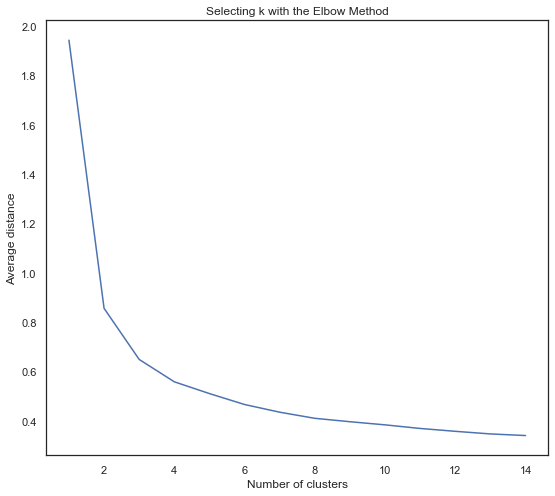

In [77]:
# loop through each cluster and fit the model to the train set
# generate the predicted cluster assingment and append the mean 
# distance my taking the sum divided by the shape
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(iris_SP)
    clusassign=model.predict(iris_SP)
    meandist.append(sum(np.min(cdist(iris_SP, model.cluster_centers_, 'euclidean'), axis=1))
    / iris_SP.shape[0])

"""
Plot average distance from observations from the cluster centroid
to use the Elbow Method to identify number of clusters to choose
"""
plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method') 
# pick the fewest number of clusters that reduces the average distance
# If you observe after 3 we can see graph is almost linear


Apply k-Means machine learning algorithm on this no-labels data set. We will compute and plot the sum of squared distances against the different values of k (starting from 1). The optimal number of clusters is given by the sharp turn in the Elbow graph. In this case, the optimal number is 3.

The optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration. Now that we have the optimum amount of clusters, we can move on to applying K-means clustering to the Iris dataset. [4]

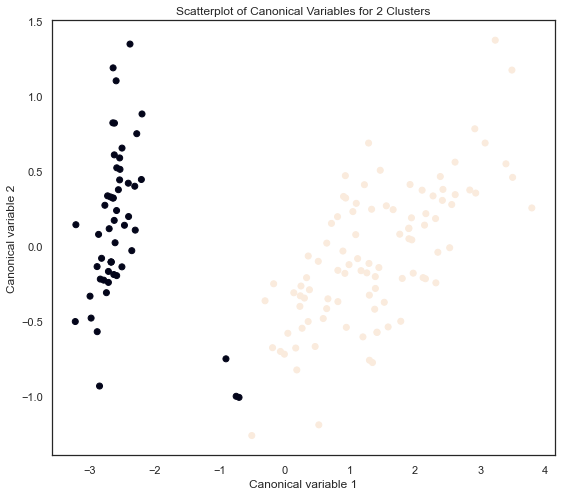

In [78]:
# Here we are just analyzing if we consider 2 cluster instead of 3 by using PCA 
model3=KMeans(n_clusters=2)
model3.fit(iris_SP) # has cluster assingments based on using 2 clusters
clusassign=model3.predict(iris_SP)
# plot clusters
''' Canonical Discriminant Analysis for variable reduction:
1. creates a smaller number of variables
2. linear combination of clustering variables
3. Canonical variables are ordered by proportion of variance accounted for
4. most of the variance will be accounted for in the first few canonical variables
'''
from sklearn.decomposition import PCA # CA from PCA function
pca_2 = PCA(2) # return 2 first canonical variables
plot_columns = pca_2.fit_transform(iris_SP) # fit CA to the train dataset
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model3.labels_,) 
# plot 1st canonical variable on x axis, 2nd on y-axis
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 2 Clusters')
plt.show() 
# close or overlapping clusters idicate correlated variables with low in-class variance 
# but not good separation. 2 cluster might be better.

Hierarchical clustering, as the name implies is an algorithm that builds a hierarchy of clusters. This algorithm begins with all the data assigned to a cluster of their own. Then two closest clusters are joined into the same cluster. In the end, this algorithm ends when there is only a single cluster left. [10]

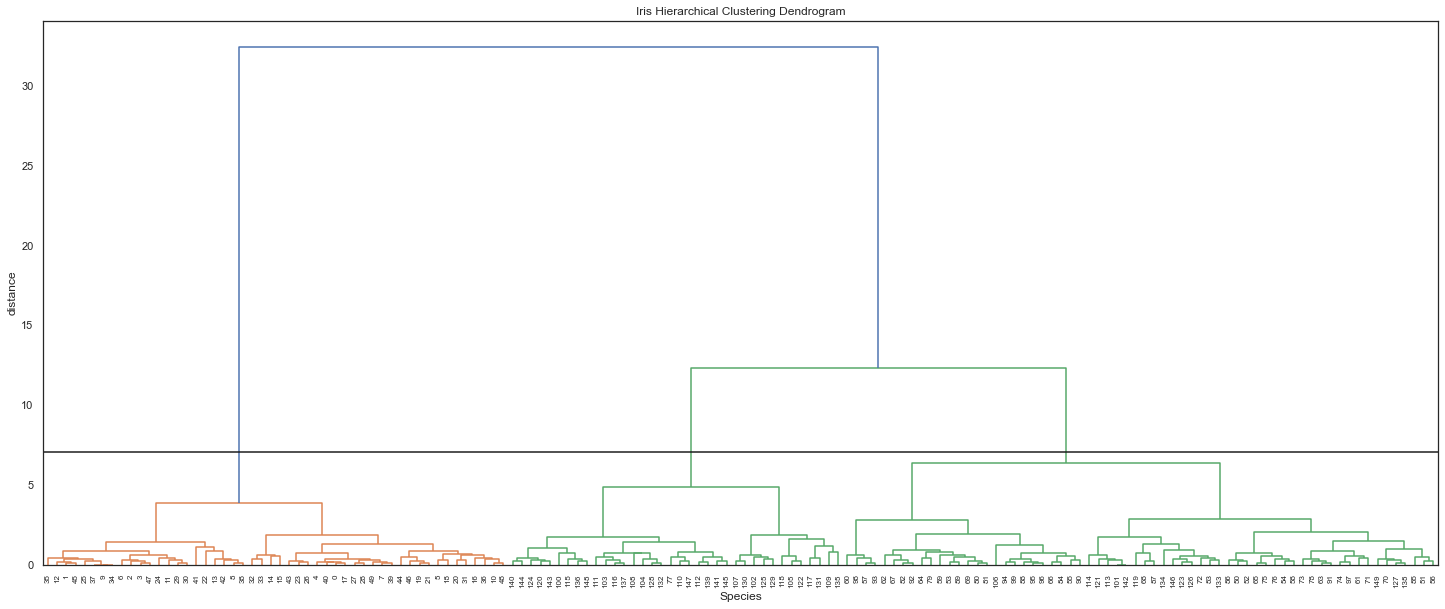

In [79]:
# calculate full dendrogram https://www.kaggle.com/esanvsh/iris-clustering-with-k-means-hierarchical
from scipy.cluster.hierarchy import dendrogram, linkage

# generate the linkage matrix
Z = linkage(iris_SP, 'ward')

# set cut-off to 150
max_d = 7.08                # max_d as in max_distance

plt.figure(figsize=(25, 10))
plt.title('Iris Hierarchical Clustering Dendrogram')
plt.xlabel('Species')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=150,                  # Try changing values of p
    leaf_rotation=90.,      # rotates the x axis labels
    leaf_font_size=8.,      # font size for the x axis labels
)
plt.axhline(y=max_d, c='k')
plt.show()

['setosa' 'versicolor' 'virginica']


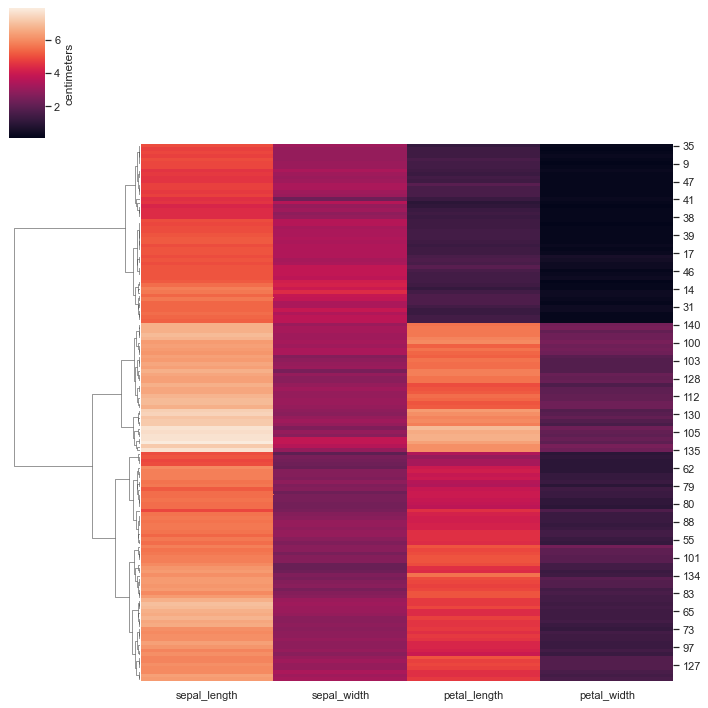

In [3]:
import seaborn as sns; sns.set(color_codes=True) 
iris = sns.load_dataset("iris")
species = iris.pop("species")   # Remove the species column
print(species.unique())         # The samples seems to be from these three species
sns.clustermap(iris, method="ward", col_cluster=False, cbar_kws={'label': 'centimeters'}); # Cluster only the rows
#plt.colorbar().ax.set_title('This is a title')
#plt.gca().images[-1].colorbar.ax.set_title("title")


The visualisation consists of two parts: the heatmap, whose rows and/or columns may be reordered so as to have the elements of the same cluster next to each other; and the dendrogram, which shows the way the clusters were merged. The colors give the length of the corresponding features. One can discern three clusters in the above heatmap and dendrogram. [7]

Difference between K Means and Hierarchical clustering
* Hierarchical clustering can’t handle big data well but K Means clustering can. This is because the time complexity of K Means is linear i.e. O(n) while that of hierarchical clustering is quadratic i.e. O(n2).
* In K Means clustering, as we start with an arbitrary choice of clusters, the results generated by running the algorithm multiple times might differ. While results are reproducible in Hierarchical clustering.
* K Means is found to work well when the shape of the clusters is hyper spherical (like circle in 2D, sphere in 3D).
* K-Means doesn’t allow noisy data, while in Hierarchical we can directly use noisy dataset for clustering. [10]

## K-Means clustering of the Iris Dataset

In [24]:
centers = km.cluster_centers_
print(centers)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


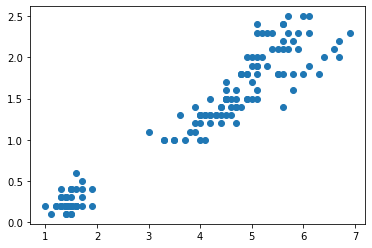

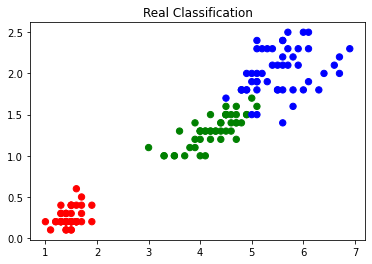

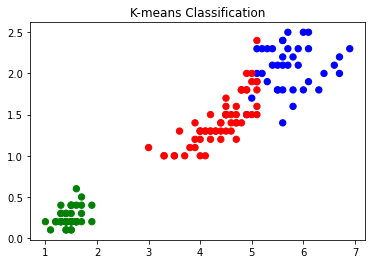

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

iris = datasets.load_iris()
x = pd.DataFrame(iris.data)
x.columns = ['Sepal_Length','Sepal_width','Petal_Length','Petal_width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']
model=KMeans(n_clusters=3)
model.fit(x)
plt.scatter(x.Petal_Length, x.Petal_width)
plt.show()

colormap=np.array(['Red','green','blue'])
plt.scatter(x.Petal_Length, x.Petal_width,c=colormap[y.Targets],s=40)
plt.title('Real Classification')
plt.show()

plt.scatter(x.Petal_Length, x.Petal_width,c=colormap[model.labels_],s=40)
plt.title('K-means Classification')
plt.show()

Text(0.5, 1.0, 'Predicted')

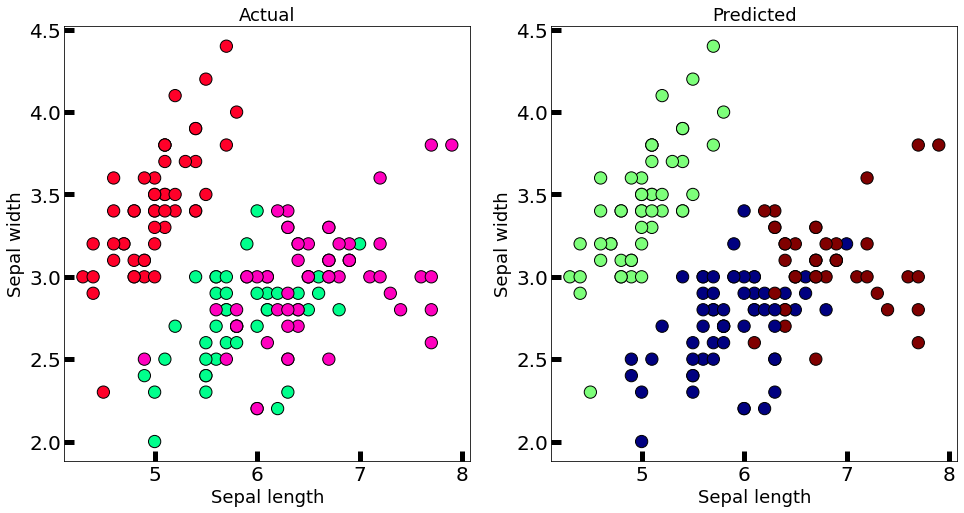

In [25]:
#this will tell us to which cluster does the data observations belong.
new_labels = km.labels_
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

K means is an iterative clustering algorithm that aims to find local maxima in each iteration. Initially desired number of clusters are chosen. Since we know that there are 3 classes involved, we program the algorithm to group the data into 3 classes, by passing the parameter “n_clusters” into our KMeans model. Now randomly three points(inputs) are assigned into three cluster. Based on the centroid distance between each points the next given inputs are segregated into respected clusters. Now, re-computing the centroids for all the clusters.

Each centroid of a cluster is a collection of feature values which define the resulting groups. Examining the centroid feature weights can be used to qualitatively interpret what kind of group each cluster represent. [10] 



Text(0.5, 0.92, 'K Means')

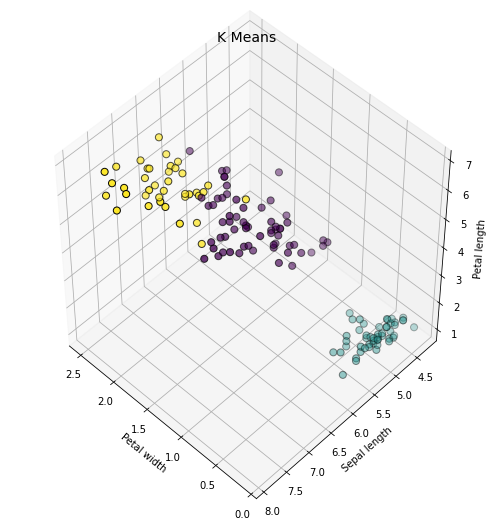

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline
from sklearn import datasets
#Iris Dataset
iris = datasets.load_iris()
X = iris.data
#KMeans
km = KMeans(n_clusters=3)
km.fit(X)
km.predict(X)
labels = km.labels_
#Plotting
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X[:, 3], X[:, 0], X[:, 2],
          c=labels.astype(np.float), edgecolor="k", s=50)
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
plt.title("K Means", fontsize=14)

k-means clustering is a method of vector quantisation, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells. It is popular for cluster analysis in data mining. k-means clustering minimizes within-cluster variances (squared Euclidean distances), but not regular Euclidean distances, which would be the more difficult Weber problem: the mean optimizes squared errors, whereas only the geometric median minimizes Euclidean distances. For instance, better Euclidean solutions can be found using k-medians and k-medoids. [5] 

One issue with K-means, as see in the 3D diagram above, is that it does hard labels. However, you can see that datapoints at the boundary of the purple and yellow clusters can be either one. For such circumstances, a different approach may be necessary. [6]

In K-Means, we do what is called “hard labeling”, where we simply add the label of the maximum probability. However, certain data points that exist at the boundary of clusters may simply have similar probabilities of being on either clusters. In such circumstances, we look at all the probabilities instead of the max probability. This is known as “soft labeling”.

Text(0.5, 0.92, 'Gaussian Mixture Model')

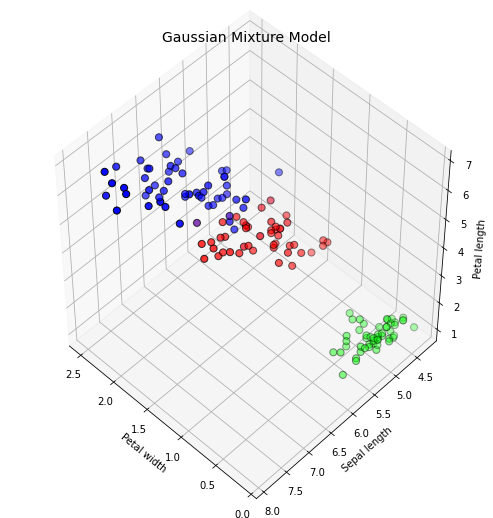

In [18]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline
from sklearn import datasets
#Iris Dataset
iris = datasets.load_iris()
X = iris.data
#Gaussian Mixture Model
gmm = GaussianMixture(n_components=3)
gmm.fit(X)
proba_lists = gmm.predict_proba(X)
#Plotting
colored_arrays = np.matrix(proba_lists)
colored_tuples = [tuple(i.tolist()[0]) for i in colored_arrays]
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X[:, 3], X[:, 0], X[:, 2],
          c=colored_tuples, edgecolor="k", s=50)
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
plt.title("Gaussian Mixture Model", fontsize=14)

For the above Gaussian Mixure Model, the colors of the datapoints are based on the Gaussian probability of being near the cluster. The RGB values are based on the nearness to each of the red, blue and green clusters. If you look at the datapoints near the boundary of the blue and red cluster, you shall see purple, indicating the datapoints are close to either clusters. [6] 

### Conclusion

Machine learning is the most fundamental approach to achieve AI. Iris flower recognition to introduce the workflow of machine learning in pattern recognition is shown. In this case, the meaning of pattern recognition and how the machine learning works in pattern recognition has been described. The K-means algorithm, which is a very simple machine learning algorithm from the unsupervised learning method is used. [9]

### References and Biblography for Task 4
1. https://medium.com/@belen.sanchez27/predicting-iris-flower-species-with-k-means-clustering-in-python-f6e46806aaee
2. https://mmuratarat.github.io/2019-07-23/kmeans_from_scratch
3. https://www.integratedots.com/determine-number-of-iris-species-with-k-means/
4. https://www.kaggle.com/tonzowonzo/simple-k-means-clustering-on-the-iris-dataset
5. https://github.com/Anurag-KP/Predicting-Iris-Flower-Species-With-K-Means-Clustering-inPython/blob/master/KMeans_Clustering.ipynb
6. https://towardsdatascience.com/clustering-based-unsupervised-learning-8d705298ae51
7. https://saskeli.github.io/data-analysis-with-python-summer-2019/pca.html
8. https://github.com/ybenzaki/kmeans-iris-dataset-python-scikit-learn/blob/master/kmeans_clustering.py
9. http://www.eurasianjournals.com/IRIS-Flower-Classification,114606,0,2.html
10. https://school.geekwall.in/p/ByUqPnV_7/unsupervised-learning-with-python